In [90]:
# Set up Notebook
% matplotlib inline

# Standard imports
from sklearn.model_selection import GridSearchCV

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib import cm


# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

In [91]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
labels = ['clust_logFCS', 'clust_RCSI', 'clust_HDDS']

In [92]:
x_train=train_data.drop(labels, axis=1)
x_train = x_train.drop(x_train.columns[0], axis=1)
x_test=test_data.drop(labels, axis=1)
x_test = x_test.drop(x_test.columns[0], axis=1)

x_train.head()

,clust_L12raincytot,clust_L12day1rain,clust_L12maxdays,clust_floodmax,clust_cells_own,clust_price,clust_thinn,clust_roof,clust_hhsize,clust_hh_age,clust_hh_gender,clust_asset,clust_dist_road,clust_dist_admarc,clust_percent_ag,clust_nutri_reten_constrained,clust_elevation,ipc_lag1,ipc_lag12
0,1090.06130,43,17,0.0,0.1250,3.824215,0.359375,0.1250,5.4375,41.6250,1.2500,-0.327686,1.395625,5.176875,0.6000,0.0000,1311.8750,1.0,NaN
1,855.86176,58,40,0.0,0.4375,3.917409,0.250000,0.1875,5.6875,36.5625,1.3125,-0.202549,0.756875,5.408750,0.6000,0.9375,496.0000,1.0,NaN
2,1300.24370,53,29,0.0,1.5000,3.683867,0.250000,0.5000,6.3750,40.4375,1.3750,0.548275,0.163125,17.038126,0.4500,1.0000,526.7500,1.0,NaN
3,1036.97120,52,29,0.0,0.6250,4.061391,0.500000,0.2500,5.4375,46.8750,1.1875,-0.077412,5.803750,7.724375,0.4375,0.0000,564.1875,1.0,NaN
4,952.18280,54,25,0.0,0.5625,3.879500,0.250000,0.0625,7.0000,43.8125,1.0000,-0.202549,11.286875,11.103125,0.4875,1.0000,1539.9375,1.0,NaN


In [93]:
y_train = train_data[labels]
y_test = test_data[labels]
y_test.head()

,clust_logFCS,clust_RCSI,clust_HDDS
0,3.666015,12.312500,4.687500
1,3.718879,5.352941,5.235294
2,3.799830,5.080000,5.720000
3,3.844891,4.285714,5.095238
4,3.687936,0.812500,5.312500


In [94]:
from sklearn.preprocessing import Imputer,StandardScaler

imp = Imputer(missing_values='NaN', strategy='mean', axis=0, copy=False)
x_train = imp.fit_transform(x_train)
x_test = imp.fit_transform(x_test)

ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)


In [95]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
x_train = poly.fit_transform(x_train)
x_test =  poly.fit_transform(x_test)



In [96]:
len(x_train)

768

In [50]:
from sklearn.linear_model import LinearRegression

# Create and fit our linear regression model to training data
model = LinearRegression(fit_intercept=True)
model.fit(x_train, y_train[labels[2]])

# Compute model predictions for test data
pred_linear = model.predict(x_test)

actual_linear = y_test[labels[2]]
r2_linear = stats.pearsonr(actual_linear, pred_linear)[0] ** 2
r2_linear

0.6734380246541569

In [89]:
# fit on logFCS 
from sklearn.ensemble import RandomForestRegressor

# Create Regressor with default properties
rfc = RandomForestRegressor(random_state =0,n_jobs =4,warm_start = True)

parameters = {'max_depth':np.arange( 1,4, 1 ).tolist(), 'min_samples_leaf':np.arange( 1, 4, 1 ).tolist()}
clf = GridSearchCV(rfc, parameters,cv=6, n_jobs= 4, iid = True,  refit= True,pre_dispatch= '2*n_jobs')
clf.fit(x_train, y_train[labels[2]])

# Fit estimator and display score

# Regress on test data
pred_rfr = clf.predict(x_test)

actual_rfr = y_test[labels[2]]
r2_rfc = stats.pearsonr(actual_rfr, pred_rfr)[0] ** 2
r2_rfc

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\Administrator\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\Administrator\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x000002F9D24C3AE0, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\Administrator\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\A...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x000002F9D24C3AE0, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\Administrator\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\A...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         self.io_loop = ioloop.IOLoop.current()
    477         try:
--> 478             self.io_loop.start()
        self.io_loop.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    479         except KeyboardInterrupt:
    480             pass
    481 
    482 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\tornado\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': '# fit on logFCS \nfrom sklearn.ensemble import Ra...ats.pearsonr(actual_rfr, pred_rfr)[0] ** 2\nr2_rfc', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 19, 13, 56, 49, 427010, tzinfo=tzutc()), 'msg_id': 'd0f85b2d740d4b0eb476927e008cca37', 'msg_type': 'execute_request', 'session': '46b2eed9fc1a41a5822d06325494a5c9', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'd0f85b2d740d4b0eb476927e008cca37', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'46b2eed9fc1a41a5822d06325494a5c9']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': '# fit on logFCS \nfrom sklearn.ensemble import Ra...ats.pearsonr(actual_rfr, pred_rfr)[0] ** 2\nr2_rfc', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 19, 13, 56, 49, 427010, tzinfo=tzutc()), 'msg_id': 'd0f85b2d740d4b0eb476927e008cca37', 'msg_type': 'execute_request', 'session': '46b2eed9fc1a41a5822d06325494a5c9', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'd0f85b2d740d4b0eb476927e008cca37', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'46b2eed9fc1a41a5822d06325494a5c9'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': '# fit on logFCS \nfrom sklearn.ensemble import Ra...ats.pearsonr(actual_rfr, pred_rfr)[0] ** 2\nr2_rfc', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 19, 13, 56, 49, 427010, tzinfo=tzutc()), 'msg_id': 'd0f85b2d740d4b0eb476927e008cca37', 'msg_type': 'execute_request', 'session': '46b2eed9fc1a41a5822d06325494a5c9', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'd0f85b2d740d4b0eb476927e008cca37', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='# fit on logFCS \nfrom sklearn.ensemble import Ra...ats.pearsonr(actual_rfr, pred_rfr)[0] ** 2\nr2_rfc', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = '# fit on logFCS \nfrom sklearn.ensemble import Ra...ats.pearsonr(actual_rfr, pred_rfr)[0] ** 2\nr2_rfc'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('# fit on logFCS \nfrom sklearn.ensemble import Ra...ats.pearsonr(actual_rfr, pred_rfr)[0] ** 2\nr2_rfc',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('# fit on logFCS \nfrom sklearn.ensemble import Ra...ats.pearsonr(actual_rfr, pred_rfr)[0] ** 2\nr2_rfc',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='# fit on logFCS \nfrom sklearn.ensemble import Ra...ats.pearsonr(actual_rfr, pred_rfr)[0] ** 2\nr2_rfc', store_history=True, silent=False, shell_futures=True)
   2723                 self.displayhook.exec_result = result
   2724 
   2725                 # Execute the user code
   2726                 interactivity = "none" if silent else self.ast_node_interactivity
   2727                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2728                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2729                 
   2730                 self.last_execution_succeeded = not has_raised
   2731                 self.last_execution_result = result
   2732 

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.ImportFrom object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>], cell_name='<ipython-input-89-1bb45e07cd08>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 2f9ea8d84a8, executio..._before_exec=None error_in_exec=None result=None>)
   2845 
   2846         try:
   2847             for i, node in enumerate(to_run_exec):
   2848                 mod = ast.Module([node])
   2849                 code = compiler(mod, cell_name, "exec")
-> 2850                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x000002F9EAA6B780, file "<ipython-input-89-1bb45e07cd08>", line 9>
        result = <ExecutionResult object at 2f9ea8d84a8, executio..._before_exec=None error_in_exec=None result=None>
   2851                     return True
   2852 
   2853             for i, node in enumerate(to_run_interactive):
   2854                 mod = ast.Interactive([node])

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x000002F9EAA6B780, file "<ipython-input-89-1bb45e07cd08>", line 9>, result=<ExecutionResult object at 2f9ea8d84a8, executio..._before_exec=None error_in_exec=None result=None>)
   2905         outflag = True  # happens in more places, so it's easier as default
   2906         try:
   2907             try:
   2908                 self.hooks.pre_run_code_hook()
   2909                 #rprint('Running code', repr(code_obj)) # dbg
-> 2910                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x000002F9EAA6B780, file "<ipython-input-89-1bb45e07cd08>", line 9>
        self.user_global_ns = {'ElasticNetCV': <class 'sklearn.linear_model.coordinate_descent.ElasticNetCV'>, 'GradientBoostingRegressor': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'Imputer': <class 'sklearn.preprocessing.imputation.Imputer'>, 'In': ['', "# Set up Notebook\nget_ipython().run_line_magic('...solute_error\nfrom sklearn.metrics import r2_score", "train_data = pd.read_csv('train.csv')\ntest_data ...ls = ['clust_logFCS', 'clust_RCSI', 'clust_HDDS']", 'x_train=train_data.drop(labels, axis=1)\nx_train ...t.drop(x_test.columns[0], axis=1)\n\nx_train.head()', 'y_train = train_data[labels]\ny_test = test_data[labels]\ny_test.head()', 'from sklearn.preprocessing import Imputer,Standa...nsform(x_train)\nx_test = ss.fit_transform(x_test)', 'from sklearn.linear_model import LinearRegressio... = stats.pearsonr(actual, pred)[0] ** 2\nr2_linear', '# fit on logFCS \nfrom sklearn.ensemble import Ra...ats.pearsonr(actual_rfr, pred_rfr)[0] ** 2\nr2_rfc', 'from sklearn.linear_model import ElasticNetCV\nen... stats.pearsonr(actual_en, pred_en)[0] ** 2\nr2_en', 'from sklearn.ensemble import GradientBoostingReg..._gbr= stats.pearsonr(actual, pred)[0] ** 2\nr2_gbr', 'from sklearn.ensemble import GradientBoostingReg..._gbr= stats.pearsonr(actual, pred)[0] ** 2\nr2_gbr', 'from sklearn.ensemble import GradientBoostingReg..._gbr= stats.pearsonr(actual, pred)[0] ** 2\nr2_gbr', 'from sklearn.ensemble import GradientBoostingReg..._gbr= stats.pearsonr(actual, pred)[0] ** 2\nr2_gbr', 'from sklearn.ensemble import GradientBoostingReg..._gbr= stats.pearsonr(actual, pred)[0] ** 2\nr2_gbr', 'from sklearn.ensemble import GradientBoostingReg..._gbr= stats.pearsonr(actual, pred)[0] ** 2\nr2_gbr', 'from sklearn.ensemble import GradientBoostingReg..._gbr= stats.pearsonr(actual, pred)[0] ** 2\nr2_gbr', "fig, axs = plt.subplots(2, 2, figsize=(10, 10))\n..._text('Scatter Plot GradientBoosting')\nplt.show()", "# Set up Notebook\nget_ipython().run_line_magic('...solute_error\nfrom sklearn.metrics import r2_score", "train_data = pd.read_csv('train.csv')\ntest_data ...ls = ['clust_logFCS', 'clust_RCSI', 'clust_HDDS']", 'x_train=train_data.drop(labels, axis=1)\nx_train ...t.drop(x_test.columns[0], axis=1)\n\nx_train.head()', ...], 'LassoCV': <class 'sklearn.linear_model.coordinate_descent.LassoCV'>, 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'Out': {3:    clust_L12raincytot  clust_L12day1rain  clust_...  NaN  
4        1539.9375       1.0        NaN  , 4:    clust_logFCS  clust_RCSI  clust_HDDS
0      3... 5.095238
4      3.687936    0.812500    5.312500, 6: 0.6734380246541569, 7: 0.6062467173981985, 8: 0.6790230640807472, 9: 0.6278815940114574, 10: 0.6527768054175702, 11: 0.6195901667840664, 12: 0.6493886005811451, 13: 0.6527397767180029, ...}, 'PolynomialFeatures': <class 'sklearn.preprocessing.data.PolynomialFeatures'>, 'RandomForestRegressor': <class 'sklearn.ensemble.forest.RandomForestRegressor'>, ...}
        self.user_ns = {'ElasticNetCV': <class 'sklearn.linear_model.coordinate_descent.ElasticNetCV'>, 'GradientBoostingRegressor': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'Imputer': <class 'sklearn.preprocessing.imputation.Imputer'>, 'In': ['', "# Set up Notebook\nget_ipython().run_line_magic('...solute_error\nfrom sklearn.metrics import r2_score", "train_data = pd.read_csv('train.csv')\ntest_data ...ls = ['clust_logFCS', 'clust_RCSI', 'clust_HDDS']", 'x_train=train_data.drop(labels, axis=1)\nx_train ...t.drop(x_test.columns[0], axis=1)\n\nx_train.head()', 'y_train = train_data[labels]\ny_test = test_data[labels]\ny_test.head()', 'from sklearn.preprocessing import Imputer,Standa...nsform(x_train)\nx_test = ss.fit_transform(x_test)', 'from sklearn.linear_model import LinearRegressio... = stats.pearsonr(actual, pred)[0] ** 2\nr2_linear', '# fit on logFCS \nfrom sklearn.ensemble import Ra...ats.pearsonr(actual_rfr, pred_rfr)[0] ** 2\nr2_rfc', 'from sklearn.linear_model import ElasticNetCV\nen... stats.pearsonr(actual_en, pred_en)[0] ** 2\nr2_en', 'from sklearn.ensemble import GradientBoostingReg..._gbr= stats.pearsonr(actual, pred)[0] ** 2\nr2_gbr', 'from sklearn.ensemble import GradientBoostingReg..._gbr= stats.pearsonr(actual, pred)[0] ** 2\nr2_gbr', 'from sklearn.ensemble import GradientBoostingReg..._gbr= stats.pearsonr(actual, pred)[0] ** 2\nr2_gbr', 'from sklearn.ensemble import GradientBoostingReg..._gbr= stats.pearsonr(actual, pred)[0] ** 2\nr2_gbr', 'from sklearn.ensemble import GradientBoostingReg..._gbr= stats.pearsonr(actual, pred)[0] ** 2\nr2_gbr', 'from sklearn.ensemble import GradientBoostingReg..._gbr= stats.pearsonr(actual, pred)[0] ** 2\nr2_gbr', 'from sklearn.ensemble import GradientBoostingReg..._gbr= stats.pearsonr(actual, pred)[0] ** 2\nr2_gbr', "fig, axs = plt.subplots(2, 2, figsize=(10, 10))\n..._text('Scatter Plot GradientBoosting')\nplt.show()", "# Set up Notebook\nget_ipython().run_line_magic('...solute_error\nfrom sklearn.metrics import r2_score", "train_data = pd.read_csv('train.csv')\ntest_data ...ls = ['clust_logFCS', 'clust_RCSI', 'clust_HDDS']", 'x_train=train_data.drop(labels, axis=1)\nx_train ...t.drop(x_test.columns[0], axis=1)\n\nx_train.head()', ...], 'LassoCV': <class 'sklearn.linear_model.coordinate_descent.LassoCV'>, 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'Out': {3:    clust_L12raincytot  clust_L12day1rain  clust_...  NaN  
4        1539.9375       1.0        NaN  , 4:    clust_logFCS  clust_RCSI  clust_HDDS
0      3... 5.095238
4      3.687936    0.812500    5.312500, 6: 0.6734380246541569, 7: 0.6062467173981985, 8: 0.6790230640807472, 9: 0.6278815940114574, 10: 0.6527768054175702, 11: 0.6195901667840664, 12: 0.6493886005811451, 13: 0.6527397767180029, ...}, 'PolynomialFeatures': <class 'sklearn.preprocessing.data.PolynomialFeatures'>, 'RandomForestRegressor': <class 'sklearn.ensemble.forest.RandomForestRegressor'>, ...}
   2911             finally:
   2912                 # Reset our crash handler in place
   2913                 sys.excepthook = old_excepthook
   2914         except SystemExit as e:

...........................................................................
C:\Users\Administrator\OneDrive - University of Illinois - Urbana\python\MalawiPaper\<ipython-input-89-1bb45e07cd08> in <module>()
      4 # Create Regressor with default properties
      5 rfc = RandomForestRegressor(random_state =0,n_jobs =4,warm_start = True)
      6 
      7 parameters = {'max_depth':np.arange( 1,4, 1 ).tolist(), 'min_samples_leaf':np.arange( 1, 4, 1 ).tolist()}
      8 clf = GridSearchCV(rfc, parameters,cv=6, n_jobs= 4, iid = True,  refit= True,pre_dispatch= '2*n_jobs')
----> 9 clf.fit(x_train, y_train[labels[2]])
     10 
     11 # Fit estimator and display score
     12 
     13 # Regress on test data

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py in fit(self=GridSearchCV(cv=6, error_score='raise',
       e...ain_score='warn',
       scoring=None, verbose=0), X=     clust_L12raincytot  clust_L12day1rain  clus...0       1.0        1.0  

[768 rows x 19 columns], y=0      4.1875
1      4.8125
2      6.0000
3     ...500
Name: clust_HDDS, Length: 768, dtype: float64, groups=None, **fit_params={})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method _BaseKFold.split of KFold(n_splits=6, random_state=None, shuffle=False)>
        X =      clust_L12raincytot  clust_L12day1rain  clus...0       1.0        1.0  

[768 rows x 19 columns]
        y = 0      4.1875
1      4.8125
2      6.0000
3     ...500
Name: clust_HDDS, Length: 768, dtype: float64
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=4), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=4)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Thu Apr 19 08:56:50 2018
PID: 13472        Python 3.6.4: C:\Users\Administrator\Anaconda3\python.exe
...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (RandomForestRegressor(bootstrap=True, criterion=...alse, random_state=0, verbose=0, warm_start=True),      clust_L12raincytot  clust_L12day1rain  clus...0       1.0        1.0  

[768 rows x 19 columns], 0      4.1875
1      4.8125
2      6.0000
3     ...500
Name: clust_HDDS, Length: 768, dtype: float64, {'score': <function _passthrough_scorer>}, array([128, 129, 130, 131, 132, 133, 134, 135, 1..., 760, 761, 762, 763, 764,
       765, 766, 767]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...18, 119, 120, 121, 122, 123, 124, 125, 126, 127]), 0, {'max_depth': 1, 'min_samples_leaf': 1}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (RandomForestRegressor(bootstrap=True, criterion=...alse, random_state=0, verbose=0, warm_start=True),      clust_L12raincytot  clust_L12day1rain  clus...0       1.0        1.0  

[768 rows x 19 columns], 0      4.1875
1      4.8125
2      6.0000
3     ...500
Name: clust_HDDS, Length: 768, dtype: float64, {'score': <function _passthrough_scorer>}, array([128, 129, 130, 131, 132, 133, 134, 135, 1..., 760, 761, 762, 763, 764,
       765, 766, 767]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...18, 119, 120, 121, 122, 123, 124, 125, 126, 127]), 0, {'max_depth': 1, 'min_samples_leaf': 1})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=RandomForestRegressor(bootstrap=True, criterion=...alse, random_state=0, verbose=0, warm_start=True), X=     clust_L12raincytot  clust_L12day1rain  clus...0       1.0        1.0  

[768 rows x 19 columns], y=0      4.1875
1      4.8125
2      6.0000
3     ...500
Name: clust_HDDS, Length: 768, dtype: float64, scorer={'score': <function _passthrough_scorer>}, train=array([128, 129, 130, 131, 132, 133, 134, 135, 1..., 760, 761, 762, 763, 764,
       765, 766, 767]), test=array([  0,   1,   2,   3,   4,   5,   6,   7,  ...18, 119, 120, 121, 122, 123, 124, 125, 126, 127]), verbose=0, parameters={'max_depth': 1, 'min_samples_leaf': 1}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    453 
    454     try:
    455         if y_train is None:
    456             estimator.fit(X_train, **fit_params)
    457         else:
--> 458             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method BaseForest.fit of RandomForestRegr...lse, random_state=0, verbose=0, warm_start=True)>
        X_train =      clust_L12raincytot  clust_L12day1rain  clus...0       1.0        1.0  

[640 rows x 19 columns]
        y_train = 128    3.3125
129    5.8750
130    3.6875
131   ...500
Name: clust_HDDS, Length: 640, dtype: float64
        fit_params = {}
    459 
    460     except Exception as e:
    461         # Note fit time as time until error
    462         fit_time = time.time() - start_time

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py in fit(self=RandomForestRegressor(bootstrap=True, criterion=...alse, random_state=0, verbose=0, warm_start=True), X=     clust_L12raincytot  clust_L12day1rain  clus...0       1.0        1.0  

[640 rows x 19 columns], y=128    3.3125
129    5.8750
130    3.6875
131   ...500
Name: clust_HDDS, Length: 640, dtype: float64, sample_weight=None)
    242         -------
    243         self : object
    244             Returns self.
    245         """
    246         # Validate or convert input data
--> 247         X = check_array(X, accept_sparse="csc", dtype=DTYPE)
        X =      clust_L12raincytot  clust_L12day1rain  clus...0       1.0        1.0  

[640 rows x 19 columns]
    248         y = check_array(y, accept_sparse='csc', ensure_2d=False, dtype=None)
    249         if sample_weight is not None:
    250             sample_weight = check_array(sample_weight, ensure_2d=False)
    251         if issparse(X):

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py in check_array(array=array([[1.0040403e+03, 5.4000000e+01, 2.2000000e...   1.0000000e+00, 1.0000000e+00]], dtype=float32), accept_sparse='csc', dtype=<class 'numpy.float32'>, order=None, copy=False, force_all_finite=True, ensure_2d=True, allow_nd=False, ensure_min_samples=1, ensure_min_features=1, warn_on_dtype=False, estimator=None)
    448             array = array.astype(np.float64)
    449         if not allow_nd and array.ndim >= 3:
    450             raise ValueError("Found array with dim %d. %s expected <= 2."
    451                              % (array.ndim, estimator_name))
    452         if force_all_finite:
--> 453             _assert_all_finite(array)
        array = array([[1.0040403e+03, 5.4000000e+01, 2.2000000e...   1.0000000e+00, 1.0000000e+00]], dtype=float32)
    454 
    455     shape_repr = _shape_repr(array.shape)
    456     if ensure_min_samples > 0:
    457         n_samples = _num_samples(array)

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py in _assert_all_finite(X=array([[1.0040403e+03, 5.4000000e+01, 2.2000000e...   1.0000000e+00, 1.0000000e+00]], dtype=float32))
     39     # everything is finite; fall back to O(n) space np.isfinite to prevent
     40     # false positives from overflow in sum method.
     41     if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
     42             and not np.isfinite(X).all()):
     43         raise ValueError("Input contains NaN, infinity"
---> 44                          " or a value too large for %r." % X.dtype)
        X.dtype = dtype('float32')
     45 
     46 
     47 def assert_all_finite(X):
     48     """Throw a ValueError if X contains NaN or infinity.

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').
___________________________________________________________________________

In [100]:
for name, importance in zip(list(x_train[0]), rfc.feature_importances_):
       print(name, "=", importance)

1.0 = 0.0
0.5020639319398537 = 0.0
-0.22404249646216765 = 0.0
-0.6383351706608783 = 0.0033250928832943964
-0.15815906898479906 = 0.0
-0.8009580842505098 = 0.6052837272771445
1.2553187519580653 = 0.0
-0.8649621147313515 = 0.0036549616414155257
-0.8064220218597932 = 0.0
1.2168647378739366 = 0.0
-0.1170926151084729 = 0.0
0.08669219704583025 = 0.0
-0.9473257459071026 = 0.029811808843709608
-0.6868640994904333 = 0.0
-0.4993913809306527 = 0.0
0.9432724216646193 = 0.0
-0.6680321771992773 = 0.0
1.2732028033790372 = 0.0
-0.41899526666296194 = 0.0
0.0 = 0.0
0.252068191754906 = 0.0019272346250623642
-0.11248365669541664 = 0.0005671554946675068
-0.32048506567749807 = 0.0018411031969107618
-0.07940596404645478 = 0.0
-0.40213216509782357 = 0.0048341705901424415
0.6302502684458962 = 0.0
-0.43426628030103315 = 0.0
-0.4048754110978144 = 0.0
0.6109438949359479 = 0.0037095264012799297
-0.05878797874247982 = 0.00023959141488565696
0.043525025317334105 = 0.0
-0.4756180888179747 = 0.0012603439703603287
-0.3

In [97]:
# fit on logFCS 
from sklearn.ensemble import RandomForestRegressor

# Create Regressor with default properties
rfc = RandomForestRegressor(random_state =0,n_jobs =4,warm_start = True,max_depth=4, min_samples_leaf=5 )

rfc.fit(x_train, y_train[labels[2]])
# Fit estimator and display score

# Regress on test data
pred = rfc.predict(x_test)

actual = y_test[labels[2]]
r2_rfc = stats.pearsonr(actual, pred)[0] ** 2
r2_rfc

0.6473430686792643

In [53]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(alphas=(400,800), fit_intercept=True, normalize=False, scoring=None, cv=5, gcv_mode='auto', store_cv_values=False) 

# Define different alpha values for different fits
# alpha = [0.0, 1E-6, 1E-4, 1E-2, 1.0]

ridge.fit(x_train, y_train[labels[2]])
pred = ridge.predict(x_test)

actual = y_test[labels[2]]
r2_ridge= stats.pearsonr(actual, pred)[0] ** 2
r2_ridge

0.6236000039039707

In [74]:
from sklearn.linear_model import BayesianRidge
bridge = BayesianRidge(alpha_1=30, alpha_2=70,lambda_1=0.01, compute_score=True)
bridge.fit(x_train, y_train[labels[2]])
pred = bridge.predict(x_test)

actual = y_test[labels[2]]
r2_bridge= stats.pearsonr(actual, pred)[0] ** 2
r2_bridge

0.6246000099317235

In [69]:
from sklearn.linear_model import LassoCV

ls = LassoCV(eps=0.001, n_alphas=100, alphas=(0.01, 2), fit_intercept=True,precompute='auto',n_jobs=4, random_state=0, selection='cyclic')

ls = ls.fit(x_train, y_train[labels[2]])
pred = ls.predict(x_test)

actual = y_test[labels[2]]
r2_ls= stats.pearsonr(actual, pred)[0] ** 2
r2_ls

0.6687626368972857

In [74]:
x_train.head()

,clust_L12raincytot,clust_L12day1rain,clust_L12maxdays,clust_floodmax,clust_cells_own,clust_price,clust_thinn,clust_roof,clust_hhsize,clust_hh_age,clust_hh_gender,clust_asset,clust_dist_road,clust_dist_admarc,clust_percent_ag,clust_nutri_reten_constrained,clust_elevation,ipc_lag1,ipc_lag12
0,1090.06130,43,17,0.0,0.1250,3.824215,0.359375,0.1250,5.4375,41.6250,1.2500,-0.327686,1.395625,5.176875,0.6000,0.0000,1311.8750,1.0,NaN
1,855.86176,58,40,0.0,0.4375,3.917409,0.250000,0.1875,5.6875,36.5625,1.3125,-0.202549,0.756875,5.408750,0.6000,0.9375,496.0000,1.0,NaN
2,1300.24370,53,29,0.0,1.5000,3.683867,0.250000,0.5000,6.3750,40.4375,1.3750,0.548275,0.163125,17.038126,0.4500,1.0000,526.7500,1.0,NaN
3,1036.97120,52,29,0.0,0.6250,4.061391,0.500000,0.2500,5.4375,46.8750,1.1875,-0.077412,5.803750,7.724375,0.4375,0.0000,564.1875,1.0,NaN
4,952.18280,54,25,0.0,0.5625,3.879500,0.250000,0.0625,7.0000,43.8125,1.0000,-0.202549,11.286875,11.103125,0.4875,1.0000,1539.9375,1.0,NaN


In [70]:
ls.coef_

array([ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  1.19766020e-02,
        0.00000000e+00,  3.02361641e-01, -1.71363943e-02, -1.60908027e-02,
        1.56992349e-01, -6.67940243e-03, -5.74701454e-02,  4.41464855e-03,
        1.51126481e-01, -8.51168448e-02,  0.00000000e+00,  0.00000000e+00,
       -1.75608771e-02,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  5.73587956e-03, -3.81966865e-02,  0.00000000e+00,
        8.65128730e-03,  1.27867375e-02, -1.06045747e-03,  0.00000000e+00,
       -4.06479775e-02,  2.18178914e-02,  0.00000000e+00,  0.00000000e+00,
        3.34671205e-02,  1.41900046e-02,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  2.61239064e-03,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -1.63702284e-02, -1.83117247e-02,
        1.64593462e-02,  

In [53]:
from sklearn.linear_model import ElasticNetCV
en = ElasticNetCV(alphas=(0.1,0.02,3,2), copy_X=True, cv=10, eps=0.004, fit_intercept=True,
       l1_ratio=0.33, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0)

en.fit(x_train, y_train[labels[2]])

pred_en = en.predict(x_test)

actual_en = y_test[labels[2]]
r2_en= stats.pearsonr(actual_en, pred_en)[0] ** 2
r2_en


0.6836678406828095

In [54]:
from sklearn.ensemble import GradientBoostingRegressor

# Create Regressor with default properties
gbr = GradientBoostingRegressor(random_state=0,learning_rate=0.05, n_estimators=50,subsample=1, criterion='friedman_mse', min_samples_split=3)

gbr.fit(x_train, y_train[labels[2]])
pred_gbr = gbr.predict(x_test)

actual_gbr = y_test[labels[2]]
r2_gbr= stats.pearsonr(actual_gbr, pred_gbr)[0] ** 2
r2_gbr


0.6598652417211756

numpy.ndarray

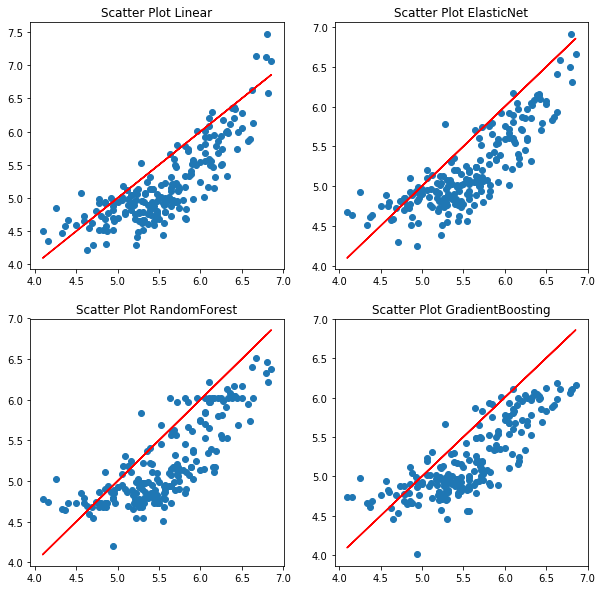

In [55]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter( actual_linear,pred_linear)
axs[0, 0].plot(actual_linear,actual_linear, color='red')

axs[1, 0].scatter( actual_rfr, pred_rfr)
axs[1, 0].plot(actual_rfr, actual_rfr, color='red')


axs[0, 1].scatter(actual_en ,pred_en )
axs[0, 1].plot(actual_en,actual_en, color='red')

axs[1, 1].scatter(actual_gbr, pred_gbr )
axs[1, 1].plot(actual_gbr, actual_gbr, color='red')


axs[0, 0].title.set_text('Scatter Plot Linear')
axs[1, 0].title.set_text('Scatter Plot RandomForest')
axs[0, 1].title.set_text('Scatter Plot ElasticNet')
axs[1, 1].title.set_text('Scatter Plot GradientBoosting')
plt.show()